# build a logistic regression classifier to recognize cats

# You will learn to:
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.
# 1-Packages
`load_dataset()`
# 2-Overview of the Problem set and Data set
`plt.imshow`
`train_set_x_orig.shape[0]`
`x_flatten = X.reshape(X.shape[0],-1).T #X.T is the transpose of X`
`train_set_x_flatten/255`
# 3 - General Architecture of the learning algorithm
# 4 - Building the parts of our algorithm
## 4.1 - Helper functions:impement sigmoid()
`s = 1/(1+np.exp(-x))`
## 4.2 Initializing parameter:initialize parameters w and b
`w = np.zeros(shape = (dim, 1))`
## 4.3-Forward and Backward propagation : learning the parameter
`A = sigmoid(np.dot(w.T,X)+b) `
`cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))`
`dw = (1/m)*np.dot(X, (A-Y).T)`
`db = (1/m)*np.sum(A-Y)`
test it with an small example
## 4.5 Optimization：update the parameters using gradient descent.
`w = w - learning_rate * dw`
`b = b - learning_rate * db`
## 4.6 Prediction:two steps
`A = sigmoid(np.dot(w.T,X) + b)`
`Y_prediction[0, i] = 1 if A[0,i] > 0.5 else 0`
# 5-Merge all functions into a model
`d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000,learning_rate = 0.005, print_cost = True)`
# 6 - Further analysis(optional/ungraded exercise)
`learning_rates = [0.01, 0.001, 0.0001]`
# 7-Test with your own image(optional/ungraded exercise)
`my_predicted_image = predict(d["w"], d["b"], my_image)`

# 1-Packages

In [1]:
import numpy as np #numpy is the fundamental package for scientific computing with Python.
import matplotlib.pyplot as plt #matplotlib is a famous library to plot graphs in Python.
import h5py #h5py is a common package to interact with a dataset that is stored on an H5 file.
import scipy
from PIL import Image #PIL and scipy are used here to test your model with your own picture at the end.
from scipy import ndimage

%matplotlib inline

In [2]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# 2-Overview of the Problem set and Data set
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).
## load_dataset()

In [3]:
#Laoding the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
#train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)
#Find the values for:
#- m_train (number of training examples)
#- m_test (number of test examples)
#- num_px (= height = width of a training image)

    We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

    Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.
## plt.imshow()

y = [1], it's a 'cat' picture.


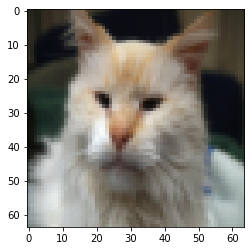

In [4]:
# Example of a picture
index = 27
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y[:,index])+", it's a '"+classes[np.squeeze(train_set_y[:,index])].decode("utf-8")+"' picture.")
#train_set_y[:,index]?
#squeeze?

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.
## train_set_x_orig.shape[0]

In [5]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training example : m_train = "+str(m_train))
print("Number of testing examples : m_test = " + str(m_test))
print("Height/Width of each image : num_px = " + str(num_px))
print("Each image is of size : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape : " + str(train_set_x_orig.shape))
print("train_set_y shape : " + str(train_set_y.shape))
print("test_set_x shape : " + str(test_set_x_orig.shape))
print("test_set_y shape : " + str(test_set_y.shape))

Number of training example : m_train = 209
Number of testing examples : m_test = 50
Height/Width of each image : num_px = 64
Each image is of size : (64, 64, 3)
train_set_x shape : (209, 64, 64, 3)
train_set_y shape : (1, 209)
test_set_x shape : (50, 64, 64, 3)
test_set_y shape : (1, 50)


- For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px*num_px*3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.
A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b*c*d, a) is to use:

## x_flatten = X.reshape(X.shape[0],-1).T #X.T is the transpose of X

In [6]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print("train_set_x_flatten shape : " + str(train_set_x_flatten.shape))
print("train_set_y shape : "+str(train_set_y.shape))
print("test_set_x_flatten shape : "+str(test_set_x_flatten.shape))
print("sanity check after reshaping : " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape : (12288, 209)
train_set_y shape : (1, 209)
test_set_x_flatten shape : (12288, 50)
sanity check after reshaping : [17 31 56 22 33]


## train_set_x_flatten/255
- To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.
- One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [7]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

- Common steps for pre-processing a new dataset are:
    - Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
    - Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
    - "Standardize" the data

# 3 - General Architecture of the learning algorithm
- why Logistic Regression is actually a very simple Neural Network
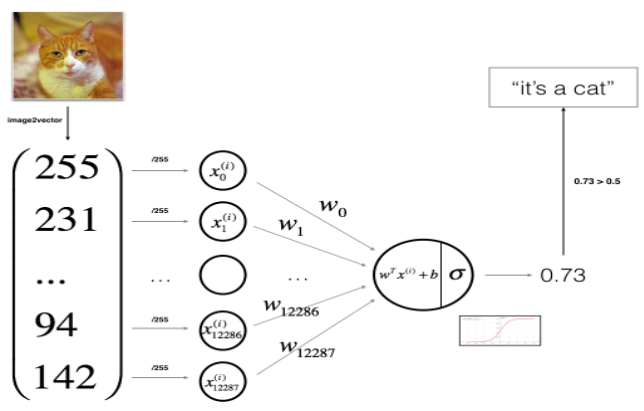
- Mathematical expression of the algorithm:
1. For one example $x^{(i)}$:
$$
\begin{gathered}
z^{(i)}=w^{T} x^{(i)}+b \\
\hat{y}^{(i)}=a^{(i)}=\operatorname{sigmoid}\left(z^{(i)}\right) \\
\mathcal{L}\left(a^{(i)}, y^{(i)}\right)=-y^{(i)} \log \left(a^{(i)}\right)-\left(1-y^{(i)}\right) \log \left(1-a^{(i)}\right)
\end{gathered}
$$
2. The cost is then computed by summing over all training examples:
$$
J=\frac{1}{m} \sum_{i=1}^{m} \mathcal{L}\left(a^{(i)}, y^{(i)}\right)
$$
3. Key steps: In this exercise, you will carry out the following steps:

    3.1 Initialize the parameters of the model
    
    3.2 Learn the parameters for the model by minimizing the cost 
    
    3.3 Use the learned parameters to make predictions (on the test set)
    
    3.4 Analyse the results and conclude

# 4 - Building the parts of our algorithm
The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    Calculate current loss (forward propagation)
    Calculate current gradient (backward propagation)
    Update parameters (gradient descent)
You often build 1-3 separately and integrate them into one function we call model()

## 4.1 - Helper functions:impement `sigmoid()`

In [8]:
# GRADED FUNCTION: sigmoid
def sigmoid(x):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-x))
    
    return s

print (sigmoid(0))#for test cause

0.5


## 4.2 Initializing parameter:initialize parameters w and b

In [9]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

In [10]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


## 4.3-Forward and Backward propagation : learning the parameter
1. Forward Propagation:

(1)You get $X$

(2)You compute $A=\sigma\left(w^{T} X+b\right)=\left(a^{(0)}, a^{(1)}, \ldots, a^{(m-1)}, a^{(m)}\right)$

(3)You calculate the cost function: $J=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log \left(a^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-a^{(i)}\right)$

2. Here are the two formulas you will be using:
$$
\begin{gathered}
\frac{\partial J}{\partial w}=\frac{1}{m} X(A-Y)^{T} \\
\frac{\partial J}{\partial b}=\frac{1}{m} \sum_{i=1}^{m}\left(a^{(i)}-y^{(i)}\right)
\end{gathered}
$$

In [11]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
            "db": db}
    
    return grads, cost

In [12]:
#test propagate function:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


## 4.5 Optimization：update the parameters using gradient descent.
For a parameter $\theta$, the update rule is $\theta=\theta-\alpha d \theta$, where $\alpha$ is the learning rate.

In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Algorithm:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector(containing 0 if non-cat, 1 if cat), of shape(1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs co
    """
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i : %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
#test func optimize
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate=0.009, print_cost=False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


## 4.6 Prediction:two steps
1. Calculate $\hat{Y}=A=\sigma\left(w^{T} X+b\right)$
2. Convert the entries of a into 0 (if activation $<=0.5$ ) or 1 (if activation $>0.5$ ), stores the predictions in a vector $Y$ _prediction . If you wish, you can use an if I else statement in a for loop (though there is also a way to vectorize this).

In [15]:
#GRADED FUNCTION:predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 ir 1 using learned logistic regression parameters(w,b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size(num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    #Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0,i] > 0.5 else 0
        
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [16]:
#test func predict
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


# 5-Merge all functions into a model
the overall model is structured by putting together all the building blocks(functions implemented in the previous parts) together, in right order

In [17]:
# GRADED FUNCTION : model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Building the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array(vector) of shape(1,m_test)
    num_iterations -- hyoerparameter representing the learning rate used in the update rule of optimize()
    print_cost -- set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    #initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    
    #Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    #Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    #predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    #print train/test Errors
    print("train accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train))*100))
    print("test accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test))*100))
    
    d ={"costs": costs,
        "Y_prediction_test" : Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" : w,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations" : num_iterations}
    return d

In [18]:
# Run the following cell to train your model
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000,learning_rate = 0.005, print_cost = True)

Cost after iteration 0 : 0.693147
Cost after iteration 100 : 0.584508
Cost after iteration 200 : 0.466949
Cost after iteration 300 : 0.376007
Cost after iteration 400 : 0.331463
Cost after iteration 500 : 0.303273
Cost after iteration 600 : 0.279880
Cost after iteration 700 : 0.260042
Cost after iteration 800 : 0.242941
Cost after iteration 900 : 0.228004
train accuracy : 96.65071770334929 %
test accuracy : 72.0 %


Comment: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the index variable) you can look at predictions on pictures of the test set.

y = 0, you predicted that it is a "cat" picture.


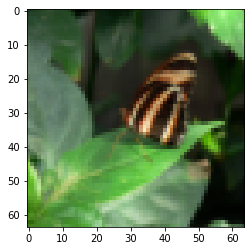

In [19]:
# Example of a picture that was wrongly classified
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +"\" picture.")

这里原代码`classes[d["Y_prediction_test"][0,index]]`出现了问题`only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices`;一步步从`d["Y_prediction_test"]`到`d["Y_prediction_test"][0,index]`察觉到这是个浮点数，不能作为索引，因此使用int函数将其转型

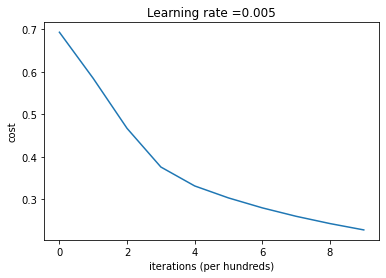

In [20]:
#Let's also plot the cost function and the gradients.
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**: You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

# 6 - Further analysis(optional/ungraded exercise)
Choice of learning rate

**Reminder**: In order for Gradient Descent to work you must choose the learning rate wisely. **The learning rate**  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

learning rate is: 0.01
train accuracy : 99.52153110047847 %
test accuracy : 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy : 88.99521531100478 %
test accuracy : 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy : 68.42105263157895 %
test accuracy : 36.0 %

-------------------------------------------------------



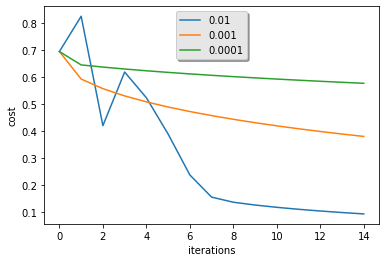

In [21]:
#compare the learning curve of our model with several choices of learning rates
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=i, print_cost=False)
    print("\n"+"-------------------------------------------------------"+'\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Interpretation:
- Different learning rates give different costs and thus different predictions results
- If the learning rate is too large(0.01), the cost may oscillate up and down. It may even diverge(though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training acccuracy is a lot highter than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting

# 7-Test with your own image(optional/ungraded exercise)
You can use your own image and see the output of your model. To do that:

1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
2. Add your image to this Jupyter Notebook's directory, in the "images" folder
3. Change your image's name in the following code
4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

y = 1.0, your algorithm predicts a "cat" picture.


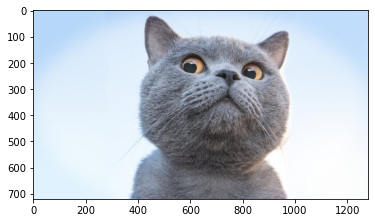

In [38]:
import imageio
import scipy.misc

my_image = "./maxresdefault.jpg"

image = np.array(imageio.imread(my_image))
my_image = np.array(Image.fromarray(image).resize((num_px,num_px))).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")
#image = np.array(ndimage.imread(fname, flatten=False))
#imread was deprecated in SciPy 1.0.0, and is removed in 1.2.0. Use imageio.imread instead.
#my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
#imresize is deprecated. imresize is deprecated in SciPy 1.0.0, and will be removed in 1.3.0. Use Pillow instead: numpy.array(Image.fromarray(arr).resize())